<div class="jumbotron">
  <h1 class="display-4">Mauricio Macri vs. Cristina Fernández de Kirchner</h1>
      <p class="lead">Discursos de Apertura de Sesiones Legislativas</p>
      <p class="lead">Períodos 2012-2015 y 2016-2019</p>
  <hr class="my-4">
      <p class="text-center">Tomamos los discursos de ambos, los unimos para obtener las palabras más importantes en cada uno de los discursos y, además, comparar las palabras que diferencian los de MM con los de CFK y viceversa.</p>
    
    <h2>
  El trabajo
  <small class="text-muted">Un análisis de discursos</small>
</h2>
<p>Teniendo ya los cuatro discursos correspondientes al actual período presidencial, sumanos los cuatro últimos del período anterior, ya que queremos analizar las palabras en las que más énfasis pusieron ambos presidentes, poniendo especial atención en que palabras diferencian un discurso del otro.</p>


<h3>
  Seguinos en las redes sociales
  <small class="text-muted">Twitter y Medium</small>
</h3>

<ul class="nav nav-tabs">
  <li class="nav-item">
    <a class="nav-link active" href="https://twitter.com/ClusterIza"><img src="img/twitter.png" width="30" height="30" class="d-inline-block" alt=""></a>
  </li>
  <li class="nav-item">
    <a class="nav-link" href="https://medium.com/@clusterizadata"><img src="img/medium.png" width="30" height="30" class="d-inline-block" alt=""></a>
  </li>
</ul>
    
</div>

<div class="jumbotron">
<h2>
  Nuestro objetivo
  <small class="text-muted">Análisis NLP de los discursos</small>
</h2>
<p>Realizar un análisis utilizando herramientas de data mining, extrayendo información de los distintos discursos de apertura de sesiones.</p>

</div>

In [23]:
# Librerias usadas
import pandas as pd
import os
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
#os.chdir(r'C://Users//Fernando//Desktop//')


In [25]:
# Cargo los discursos
#INIT_PATH = os.getcwd() + '//analisis_discurso_legislativas-master//'
INIT_PATH = os.getcwd() + '\\analisis-discurso-legislativo'

path_discursos = INIT_PATH + '\\Datos\\apertura'

with open(path_discursos+'2016.txt') as archivo:
    discMM = archivo.read()
with open(path_discursos+'2017.txt')  as archivo:
    discMM = discMM + archivo.read()
with open(path_discursos+'2018.txt')  as archivo:
    discMM = discMM + archivo.read()
with open(path_discursos+'2019.txt')  as archivo:
    discMM = discMM + archivo.read()
    
with open(path_discursos+'2012.txt') as archivo:
    discCFK = archivo.read()
with open(path_discursos+'2013.txt')  as archivo:
    discCFK = discCFK + archivo.read()
with open(path_discursos+'2014.txt')  as archivo:
    discCFK = discCFK + archivo.read()
with open(path_discursos+'2015.txt')  as archivo:
    discCFK = discCFK + archivo.read()

<div class="jumbotron">
<h1>
  ¿Qué dijeron Macri y Fernández en sus discursos?
  <small class="text-muted">Lo más importante</small>
</h1>
<p>Aplicamos técnicas de Text Mining para quedarnos con el alma del discurso.</p>
</div>

In [26]:
# Cargamos los stopwords
with open(INIT_PATH + '\\Datos\\stopwords_espaniol.txt', errors='ignore') as f:
    stop_words = f.read().splitlines()
    
# Cargo el tokenPatern para remover los numeros del texto
tokenPattern = r'(?u)\b[A-Za-z]+\b'

#seleccionamos más stopwords después de visualizar todos los discursos
nube_stop_words=['años','está','estan','están','sólo','vez','le','les','son','ciento','además','día','año','hay','había',
                 "haber","han","habían","dice","decir","decía","hizo","nivel","hablar","hoy","tema","viene","sido","sea",
                 "tenía","luego","dijo","través","ningún","grande","parte","iba","Argentina","argentino","argentina",
                 "país", "cosa","política","bueno","después","obviamente", "hubiera","importante","días","así",
                 "tuvo","pasó"]

for pal in nube_stop_words:
    stop_words.append(pal)

In [27]:
# definimos los parametros de la nube
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

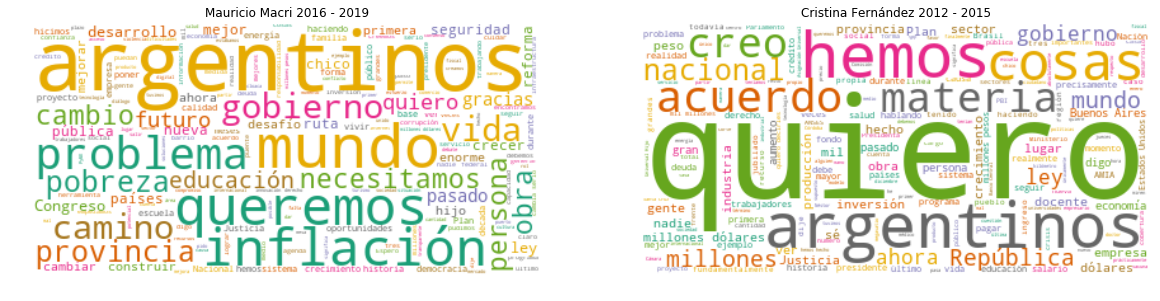

In [28]:
#plot de los cuatro discursos después de nube stop_words

plt.rcParams['figure.figsize'] = [20,12]

wc.generate(discMM)
plt.subplot(1, 2, 1)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Mauricio Macri 2016 - 2019")

wc.generate(discCFK)
plt.subplot(1, 2, 2)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Cristina Fernández 2012 - 2015")

plt.show()

In [29]:
#### TF - IDF
tfidf = TfidfVectorizer(stop_words=stop_words, token_pattern=tokenPattern)
response = tfidf.fit_transform([discMM, discCFK])

feature_names = tfidf.get_feature_names()
lst = []
cols = ['palabra','frecuencia']
for col in response.nonzero()[1]:
    lst.append([feature_names[col],response[0, col]])
pdFrecuencias = pd.DataFrame(lst, columns=cols)

#separo y guardo los resultados TF-IDF
pd_TFIDF = pdFrecuencias.sort_values(by=['frecuencia'],ascending=[False])
pd_TFIDF = pd_TFIDF.drop_duplicates()
pd_TFIDF_not0 = pd_TFIDF[(pd_TFIDF.frecuencia != 0)]
pd_TFIDF_not0 = pd_TFIDF_not0.drop("frecuencia",axis=1)

pd_TFIDF.to_csv(INIT_PATH + '/Datos/TFIDF_MMvsCFK.csv',encoding='utf-8-sig', index=False, header=False)
pd_TFIDF_not0.to_csv(INIT_PATH + '/Datos/TFIDF_not_0_MMvsCFK.csv',encoding='utf-8-sig', index=False, header=False)


with open(INIT_PATH + '/Datos/TFIDF_not_0_MMvsCFK.csv', 'r', encoding='utf-8-sig') as f:
    TFIDF_stop_words = f.read().splitlines()

stop_words.extend(TFIDF_stop_words)

# definimos los parametros de la nube
wc = WordCloud(stopwords=stop_words, background_color="rgba(254, 254, 254, 0)", colormap="Dark2", 
               max_font_size=250, max_words=70, random_state=42)


<div class="jumbotron">
<h1>
  ¿Qué palabras distinguen un discurso del otro?
  <p><small class="text-muted">Comparación relativa de la discursos</small></p>
</h1>
<p> Estas son las palabras que más mencionó Mauricio Macri en comparación con los discursos de Cristina Fernández de Kirchner y viceversa. Esto nos permite deducir dónde esta lo que diferencia a cada uno de los presidentes en sus discursos de apertura de sesiones legislativas.</p>
</div>

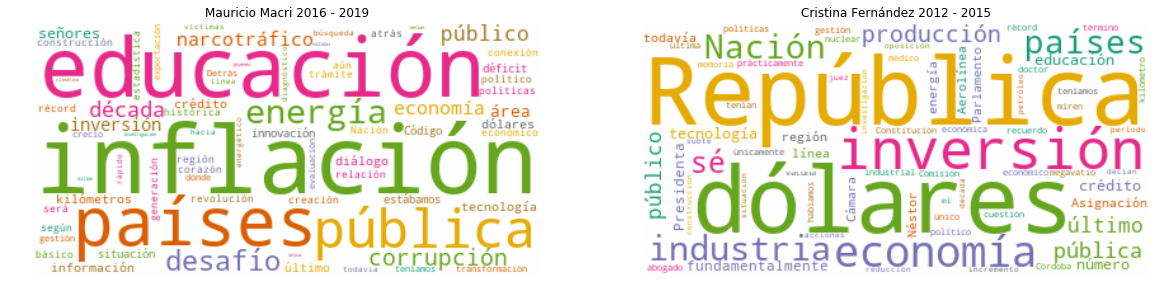

In [32]:
#Discursos limpios luego de aplicar Stop_Word + TFIDF_stop_words
wc.generate(discMM)
plt.subplot(1, 2, 1)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Mauricio Macri 2016 - 2019")

wc.generate(discCFK)
plt.subplot(1, 2, 2)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Cristina Fernández 2012 - 2015")

plt.show()

In [31]:
#futuras ediciones
disc = 2015


  <div class="card-footer text-muted">
    Hecho con <span style="color: #e25555;">&#9749;</span> por <a href="https://twitter.com/ClusterIza">@ClusterIza</a>
  </div>